In [25]:
from SOSATpopy import sosat
import numpy as np
import matplotlib.pyplot as plt
from polarizationpy import polar_angle



In [ ]:
freq_list = [78,80,82,84,86,88,90,92,94,96,98,100,102] 
dx_list = [20,60,100,160,180]
Beam_dx = {}


In [14]:
for item in dx_list:
    print(item,'mm:')
    Beam_dx[str(item)] = {}
    for angle in [45]:
        Beam_dx[str(item)][str(angle)] = {'Eco':np.array([]),'Ecx':np.array([])}
        n = 0
        for freq in freq_list:
            n+=1
            Model1 = sosat(freq,
                        feedpos = [item,0,0],
                        feedrot = [0,0,angle],
                        AR_file = 'AR_LIB/normal_groove_AR.h5',
                        groupname= str(freq)+'GHz',
                        outputfolder = '../Data/output_polar_normal_groove_AR/'+str(freq)+'GHz/')
            E_co,E_cx,x,y = Model1.read_beam()
            Beam_dx[str(item)][str(angle)]['Eco']= np.concatenate((Beam_dx[str(item)][str(angle)]['Eco'],E_co))
            Beam_dx[str(item)][str(angle)]['Ecx']= np.concatenate((Beam_dx[str(item)][str(angle)]['Ecx'],E_cx))
        Beam_dx[str(item)][str(angle)]['Eco'] = Beam_dx[str(item)][str(angle)]['Eco'].reshape(n,-1)
        Beam_dx[str(item)][str(angle)]['Ecx'] = Beam_dx[str(item)][str(angle)]['Ecx'].reshape(n,-1)


20 mm:
60 mm:
100 mm:
160 mm:
180 mm:


In [ ]:
Eco = Beam_dx['20']['45']['Eco'].mean(axis=0)
Ecx = Beam_dx['20']['45']['Ecx'].mean(axis=0)


In [28]:
r= polar_angle.polarization_angle(np.concatenate((Eco,Ecx)).reshape(2,-1))


True 1.5100629586105903e-05


In [33]:
r.x*180/np.pi - 45


array([-0.00012593])

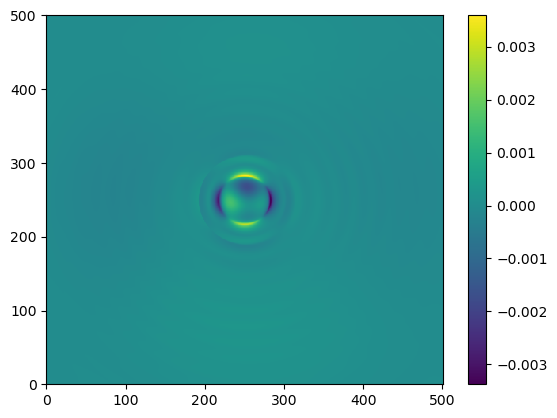

In [35]:
plt.pcolor((np.abs(Ecx.reshape(501,501))-np.abs(Eco.reshape(501,501)))/np.abs(Eco).max())
plt.colorbar()


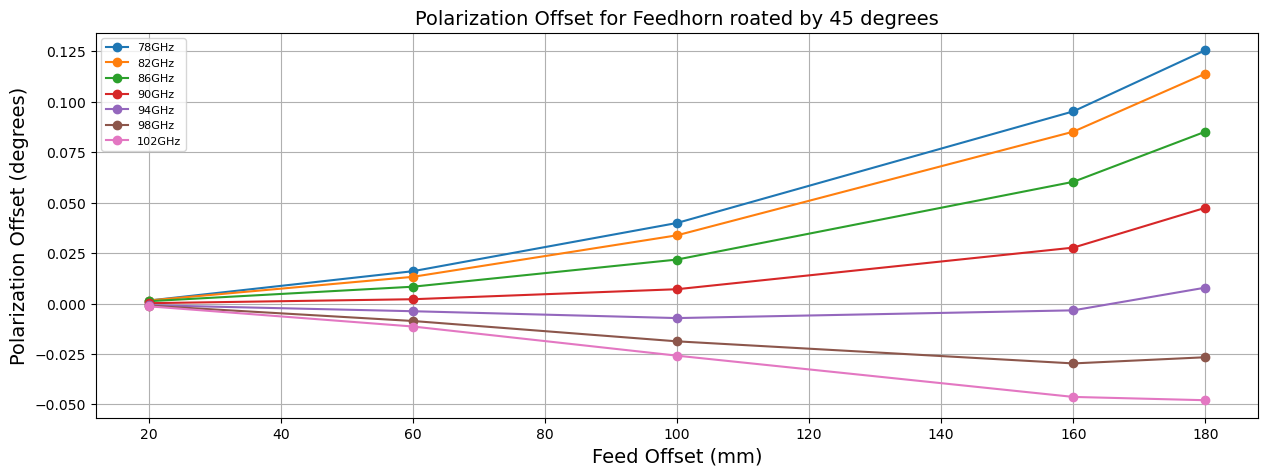

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for freq in [78,82, 86, 90, 94, 98, 102]:
    ax.plot(dx_list, Polarization_offset['Normal'][str(freq)], label=str(freq)+'GHz', marker='o')
#ax.plot(dx_list, Polarization_offset['leaning'], label='30deg Leaning 3-layer Groove AR', marker='o')
ax.set_xlabel('Feed Offset (mm)',fontsize = 14)
ax.set_ylabel('Polarization Offset (degrees)',fontsize = 14)
ax.set_title('Polarization Offset for Feedhorn roated by 45 degrees',fontsize = 14)
ax.legend(fontsize =8,loc = 'upper left')
plt.grid()
plt.savefig('ARC_effects on Polarization rotation_90GHz_band.png')


In [ ]:
def print_error(error):
    string = (error and f"{error:.3f}") or "" 
    print(string)
    return string
    #print(f"{error:.3f}")


In [ ]:
print_error(1.12365555)


1.124


'1.124'

In [ ]:
print_error('')


''